<a href="https://colab.research.google.com/github/Robinhood05/Flood_Prediction_From_Satellite_Images/blob/main/Flood_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()


In [ ]:
!curl https://sdk.cloud.google.com | bash
!gcloud init

Streaming output truncated to the last 5000 lines.
google-cloud-sdk/lib/third_party/botocore/data/accessanalyzer/2019-11-01/service-2.json
google-cloud-sdk/lib/third_party/botocore/data/account/2021-02-01/endpoint-rule-set-1.json
google-cloud-sdk/lib/third_party/botocore/data/account/2021-02-01/paginators-1.json
google-cloud-sdk/lib/third_party/botocore/data/account/2021-02-01/service-2.json
google-cloud-sdk/lib/third_party/botocore/data/acm-pca/2017-08-22/endpoint-rule-set-1.json
google-cloud-sdk/lib/third_party/botocore/data/acm-pca/2017-08-22/paginators-1.json
google-cloud-sdk/lib/third_party/botocore/data/acm-pca/2017-08-22/service-2.json
google-cloud-sdk/lib/third_party/botocore/data/acm-pca/2017-08-22/waiters-2.json
google-cloud-sdk/lib/third_party/botocore/data/acm/2015-12-08/endpoint-rule-set-1.json
google-cloud-sdk/lib/third_party/botocore/data/acm/2015-12-08/paginators-1.json
google-cloud-sdk/lib/third_party/botocore/data/acm/2015-12-08/service-2.json
google-cloud-sdk/lib/thi

In [ ]:
#@title Install gcsfuse
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
!apt -qq update
!apt -qq install gcsfuse

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1022  100  1022    0     0  11814      0 --:--:-- --:--:-- --:--:-- 11883
OK
38 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: http://packages.cloud.google.com/apt/dists/gcsfuse-bionic/InRelease: Key is stored in legacy trusted.gpg keyring (/etc/apt/trusted.gpg), see the DEPRECATION section in apt-key(8) for details.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
The following NEW packages will be installed:
  gcsfuse
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 14.8 MB of archives.
After this operation, 0 B of additional disk space will be used.
Selecting previously unselected package gcsfuse.
(Reading database ... 126308 files and 

In [ ]:
#@title Install RasterIO
"Install RasterIO"

'Install RasterIO'

In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 105.5 MB/s eta 0:00:00


In [ ]:
%cd /home
!sudo mkdir checkpoints

/home


In [ ]:
!gsutil cp gs://sen1floods11/v1.1/splits/flood_handlabeled/flood_train_data.csv .
!gsutil cp gs://sen1floods11/v1.1/splits/flood_handlabeled/flood_test_data.csv .
!gsutil cp gs://sen1floods11/v1.1/splits/flood_handlabeled/flood_valid_data.csv .

Copying gs://sen1floods11/v1.1/splits/flood_handlabeled/flood_train_data.csv...
- [1 files][ 13.3 KiB/ 13.3 KiB]                                                
Operation completed over 1 objects/13.3 KiB.                                     
Copying gs://sen1floods11/v1.1/splits/flood_handlabeled/flood_test_data.csv...
- [1 files][  4.7 KiB/  4.7 KiB]                                                
Operation completed over 1 objects/4.7 KiB.                                      
Copying gs://sen1floods11/v1.1/splits/flood_handlabeled/flood_valid_data.csv...
- [1 files][  4.7 KiB/  4.7 KiB]                                                
Operation completed over 1 objects/4.7 KiB.                                      


In [ ]:
!sudo mkdir files
!sudo mkdir files/S1
!sudo mkdir files/Labels

!gsutil -m rsync -r gs://sen1floods11/v1.1/data/flood_events/HandLabeled/S1Hand files/S1
!gsutil -m rsync -r gs://sen1floods11/v1.1/data/flood_events/HandLabeled/LabelHand files/Labels


both the source and destination. Your crcmod installation isn't using the
module's C extension, so checksumming will run very slowly. If this is your
first rsync since updating gsutil, this rsync can take significantly longer than
usual. For help installing the extension, please see "gsutil help crcmod".

Building synchronization state...
Starting synchronization...
Copying gs://sen1floods11/v1.1/data/flood_events/HandLabeled/S1Hand/Bolivia_242570_S1Hand.tif...
Copying gs://sen1floods11/v1.1/data/flood_events/HandLabeled/S1Hand/Bolivia_195474_S1Hand.tif...
Copying gs://sen1floods11/v1.1/data/flood_events/HandLabeled/S1Hand/Bolivia_360519_S1Hand.tif...
Copying gs://sen1floods11/v1.1/data/flood_events/HandLabeled/S1Hand/Bolivia_233925_S1Hand.tif...
Copying gs://sen1floods11/v1.1/data/flood_events/HandLabeled/S1Hand/Bolivia_294583_S1Hand.tif...
Copying gs://sen1floods11/v1.1/data/flood_events/HandLabeled/S1Hand/Bolivia_23014_S1Hand.tif...
Copying gs://sen1floods11/v1.1/data/flood_events/

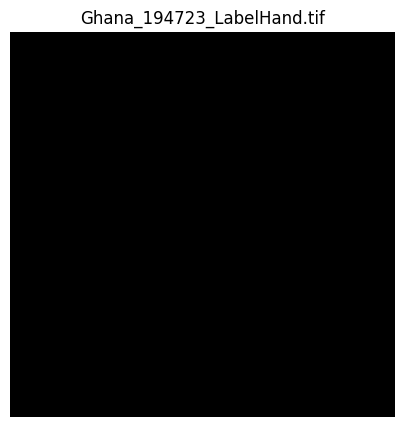

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Path to the label image
label_path = "files/Labels/Ghana_194723_LabelHand.tif"

# Open and display
label_img = Image.open(label_path)

plt.figure(figsize=(5, 5))
plt.imshow(label_img, cmap='gray')
plt.title("Ghana_194723_LabelHand.tif")
plt.axis("off")
plt.show()



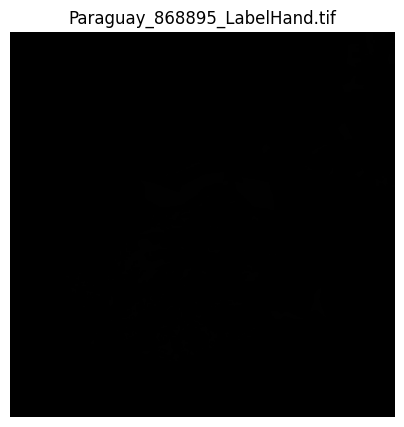

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Path to the label image
label_path = "files/Labels/Paraguay_868895_LabelHand.tif"

# Open and display
label_img = Image.open(label_path)

plt.figure(figsize=(5, 5))
plt.imshow(label_img, cmap='gray')
plt.title("Paraguay_868895_LabelHand.tif")
plt.axis("off")
plt.show()


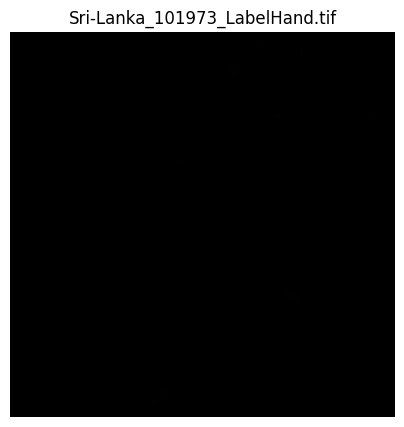

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Path to the label image
label_path = "files/Labels/Sri-Lanka_101973_LabelHand.tif"

# Open and display the image
label_img = Image.open(label_path)

plt.figure(figsize=(5, 5))
plt.imshow(label_img, cmap='gray')
plt.title("Sri-Lanka_101973_LabelHand.tif")
plt.axis("off")
plt.show()


In [ ]:
LR = 5e-4
EPOCHS = 100
EPOCHS_PER_UPDATE = 1
RUNNAME = "Sen1Floods11"

In [ ]:
import torch
from torchvision import transforms
import torchvision.transforms.functional as F
import random
from PIL import Image

class InMemoryDataset(torch.utils.data.Dataset):

  def __init__(self, data_list, preprocess_func):
    self.data_list = data_list
    self.preprocess_func = preprocess_func

  def __getitem__(self, i):
    return self.preprocess_func(self.data_list[i])

  def __len__(self):
    return len(self.data_list)


def processAndAugment(data):
  (x,y) = data
  im,label = x.copy(), y.copy()

  # convert to PIL for easier transforms
  im1 = Image.fromarray(im[0])
  im2 = Image.fromarray(im[1])
  label = Image.fromarray(label.squeeze())

  # Get params for random transforms
  i, j, h, w = transforms.RandomCrop.get_params(im1, (256, 256))

  im1 = F.crop(im1, i, j, h, w)
  im2 = F.crop(im2, i, j, h, w)
  label = F.crop(label, i, j, h, w)
  if random.random() > 0.5:
    im1 = F.hflip(im1)
    im2 = F.hflip(im2)
    label = F.hflip(label)
  if random.random() > 0.5:
    im1 = F.vflip(im1)
    im2 = F.vflip(im2)
    label = F.vflip(label)

  norm = transforms.Normalize([0.6851, 0.5235], [0.0820, 0.1102])
  im = torch.stack([transforms.ToTensor()(im1).squeeze(), transforms.ToTensor()(im2).squeeze()])
  im = norm(im)
  label = transforms.ToTensor()(label).squeeze()
  if torch.sum(label.gt(.003) * label.lt(.004)):
    label *= 255
  label = label.round()

  return im, label


def processTestIm(data):
  (x,y) = data
  im,label = x.copy(), y.copy()
  norm = transforms.Normalize([0.6851, 0.5235], [0.0820, 0.1102])

  # convert to PIL for easier transforms
  im_c1 = Image.fromarray(im[0]).resize((512,512))
  im_c2 = Image.fromarray(im[1]).resize((512,512))
  label = Image.fromarray(label.squeeze()).resize((512,512))

  im_c1s = [F.crop(im_c1, 0, 0, 256, 256), F.crop(im_c1, 0, 256, 256, 256),
            F.crop(im_c1, 256, 0, 256, 256), F.crop(im_c1, 256, 256, 256, 256)]
  im_c2s = [F.crop(im_c2, 0, 0, 256, 256), F.crop(im_c2, 0, 256, 256, 256),
            F.crop(im_c2, 256, 0, 256, 256), F.crop(im_c2, 256, 256, 256, 256)]
  labels = [F.crop(label, 0, 0, 256, 256), F.crop(label, 0, 256, 256, 256),
            F.crop(label, 256, 0, 256, 256), F.crop(label, 256, 256, 256, 256)]

  ims = [torch.stack((transforms.ToTensor()(x).squeeze(),
                    transforms.ToTensor()(y).squeeze()))
                    for (x,y) in zip(im_c1s, im_c2s)]

  ims = [norm(im) for im in ims]
  ims = torch.stack(ims)

  labels = [(transforms.ToTensor()(label).squeeze()) for label in labels]
  labels = torch.stack(labels)

  if torch.sum(labels.gt(.003) * labels.lt(.004)):
    labels *= 255
  labels = labels.round()

  return ims, labels

In [ ]:
from time import time
import csv
import os
import numpy as np
import rasterio

def getArrFlood(fname):
  return rasterio.open(fname).read()

def download_flood_water_data_from_list(l):
  i = 0
  tot_nan = 0
  tot_good = 0
  flood_data = []
  for (im_fname, mask_fname) in l:
    if not os.path.exists(os.path.join("files/", im_fname)):
      continue
    arr_x = np.nan_to_num(getArrFlood(os.path.join("files/", im_fname)))
    arr_y = getArrFlood(os.path.join("files/", mask_fname))
    arr_y[arr_y == -1] = 255

    arr_x = np.clip(arr_x, -50, 1)
    arr_x = (arr_x + 50) / 51

    if i % 100 == 0:
      print(im_fname, mask_fname)
    i += 1
    flood_data.append((arr_x,arr_y))

  return flood_data

def load_flood_train_data(input_root, label_root):
  fname = "flood_train_data.csv"
  training_files = []
  with open(fname) as f:
    for line in csv.reader(f):
      training_files.append(tuple((input_root+line[0], label_root+line[1])))

  return download_flood_water_data_from_list(training_files)

def load_flood_valid_data(input_root, label_root):
  fname = "flood_valid_data.csv"
  validation_files = []
  with open(fname) as f:
    for line in csv.reader(f):
      validation_files.append(tuple((input_root+line[0], label_root+line[1])))

  return download_flood_water_data_from_list(validation_files)

def load_flood_test_data(input_root, label_root):
  fname = "flood_test_data.csv"
  testing_files = []
  with open(fname) as f:
    for line in csv.reader(f):
      testing_files.append(tuple((input_root+line[0], label_root+line[1])))

  return download_flood_water_data_from_list(testing_files)

In [ ]:
train_data = load_flood_train_data('S1/', 'Labels/')
train_dataset = InMemoryDataset(train_data, processAndAugment)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True, sampler=None,
                  batch_sampler=None, num_workers=0, collate_fn=None,
                  pin_memory=True, drop_last=False, timeout=0,
                  worker_init_fn=None)
train_iter = iter(train_loader)

valid_data = load_flood_valid_data('S1/', 'Labels/')
valid_dataset = InMemoryDataset(valid_data, processTestIm)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=4, shuffle=True, sampler=None,
                  batch_sampler=None, num_workers=0, collate_fn=lambda x: (torch.cat([a[0] for a in x], 0), torch.cat([a[1] for a in x], 0)),
                  pin_memory=True, drop_last=False, timeout=0,
                  worker_init_fn=None)
valid_iter = iter(valid_loader)

S1/Ghana_103272_S1Hand.tif Labels/Ghana_103272_LabelHand.tif
S1/Pakistan_132143_S1Hand.tif Labels/Pakistan_132143_LabelHand.tif
S1/Sri-Lanka_916628_S1Hand.tif Labels/Sri-Lanka_916628_LabelHand.tif
S1/Ghana_5079_S1Hand.tif Labels/Ghana_5079_LabelHand.tif


In [ ]:
import torch
import torchvision.models as models
import torch.nn as nn

net = models.segmentation.fcn_resnet50(pretrained=False, num_classes=2, pretrained_backbone=False)
net.backbone.conv1 = nn.Conv2d(2, 64, kernel_size=7, stride=2, padding=3, bias=False)

criterion = nn.CrossEntropyLoss(weight=torch.tensor([1,8]).float().cuda(), ignore_index=255)
optimizer = torch.optim.AdamW(net.parameters(),lr=LR)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, len(train_loader) * 10, T_mult=2, eta_min=0, last_epoch=-1)

def convertBNtoGN(module, num_groups=16):
  if isinstance(module, torch.nn.modules.batchnorm.BatchNorm2d):
    return nn.GroupNorm(num_groups, module.num_features,
                        eps=module.eps, affine=module.affine)
    if module.affine:
        mod.weight.data = module.weight.data.clone().detach()
        mod.bias.data = module.bias.data.clone().detach()

  for name, child in module.named_children():
      module.add_module(name, convertBNtoGN(child, num_groups=num_groups))

  return module

net = convertBNtoGN(net)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained_backbone' is deprecated since 0.13 and may be removed in the future, please use 'weights_backbone' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights_backbone' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to 

In [ ]:
def computeIOU(output, target):
  output = torch.argmax(output, dim=1).flatten()
  target = target.flatten()

 def computeIOU(output, target):
    output = torch.argmax(output, dim=1).flatten().cpu()  # Added .cpu()
    target = target.flatten().cpu()  # Added .cpu()

    no_ignore = target.ne(255)
    output = output.masked_select(no_ignore)
    target = target.masked_select(no_ignore)
    intersection = torch.sum(output * target)
    union = torch.sum(target) + torch.sum(output) - intersection
    iou = (intersection + .0000001) / (union + .0000001)

    if iou != iou:
        print("failed, replacing with 0")
        iou = torch.tensor(0).float()

    return iou

def computeAccuracy(output, target):
    output = torch.argmax(output, dim=1).flatten().cpu()  # Added .cpu()
    target = target.flatten().cpu()  # Added .cpu()

    no_ignore = target.ne(255)
    output = output.masked_select(no_ignore)
    target = target.masked_select(no_ignore)
    correct = torch.sum(output.eq(target))

    return correct.float() / len(target)

def truePositives(output, target):
  output = torch.argmax(output, dim=1).flatten()
  target = target.flatten()
  no_ignore = target.ne(255).cuda()
  output = output.masked_select(no_ignore)
  target = target.masked_select(no_ignore)
  correct = torch.sum(output * target)

  return correct

def trueNegatives(output, target):
  output = torch.argmax(output, dim=1).flatten()
  target = target.flatten()
  no_ignore = target.ne(255).cuda()
  output = output.masked_select(no_ignore)
  target = target.masked_select(no_ignore)
  output = (output == 0)
  target = (target == 0)
  correct = torch.sum(output * target)

  return correct

def falsePositives(output, target):
  output = torch.argmax(output, dim=1).flatten()
  target = target.flatten()
  no_ignore = target.ne(255).cuda()
  output = output.masked_select(no_ignore)
  target = target.masked_select(no_ignore)
  output = (output == 1)
  target = (target == 0)
  correct = torch.sum(output * target)

  return correct

def falseNegatives(output, target):
  output = torch.argmax(output, dim=1).flatten()
  target = target.flatten()
  no_ignore = target.ne(255).cuda()
  output = output.masked_select(no_ignore)
  target = target.masked_select(no_ignore)
  output = (output == 0)
  target = (target == 1)
  correct = torch.sum(output * target)

  return correct

In [ ]:
training_losses = []
training_accuracies = []
training_ious = []

def train_loop(inputs, labels, net, optimizer, scheduler):
  global running_loss
  global running_iou
  global running_count
  global running_accuracy

  # zero the parameter gradients
  optimizer.zero_grad()
  net = net.cuda()

  # forward + backward + optimize
  outputs = net(inputs.cuda())
  loss = criterion(outputs["out"], labels.long().cuda())
  loss.backward()
  optimizer.step()
  scheduler.step()

  running_loss += loss
  running_iou += computeIOU(outputs["out"], labels.cuda())
  running_accuracy += computeAccuracy(outputs["out"], labels.cuda())
  running_count += 1

In [ ]:
valid_losses = []
valid_accuracies = []
valid_ious = []

def validation_loop(validation_data_loader, net):
  global running_loss
  global running_iou
  global running_count
  global running_accuracy
  global max_valid_iou

  global training_losses
  global training_accuracies
  global training_ious
  global valid_losses
  global valid_accuracies
  global valid_ious

  net = net.eval()
  net = net.cuda()
  count = 0
  iou = 0
  loss = 0
  accuracy = 0
  with torch.no_grad():
      for (images, labels) in validation_data_loader:
          net = net.cuda()
          outputs = net(images.cuda())
          valid_loss = criterion(outputs["out"], labels.long().cuda())
          valid_iou = computeIOU(outputs["out"], labels.cuda())
          valid_accuracy = computeAccuracy(outputs["out"], labels.cuda())
          iou += valid_iou
          loss += valid_loss
          accuracy += valid_accuracy
          count += 1

  iou = iou / count
  accuracy = accuracy / count

  if iou > max_valid_iou:
    max_valid_iou = iou
    save_path = os.path.join("checkpoints", "{}_{}_{}.cp".format(RUNNAME, i, iou.item()))
    torch.save(net.state_dict(), save_path)
    print("model saved at", save_path)

  loss = loss / count
  print("Training Loss:", running_loss / running_count)
  print("Training IOU:", running_iou / running_count)
  print("Training Accuracy:", running_accuracy / running_count)
  print("Validation Loss:", loss)
  print("Validation IOU:", iou)
  print("Validation Accuracy:", accuracy)


  training_losses.append(running_loss / running_count)
  training_accuracies.append(running_accuracy / running_count)
  training_ious.append(running_iou / running_count)
  valid_losses.append(loss)
  valid_accuracies.append(accuracy)
  valid_ious.append(iou)

In [ ]:
def test_loop(test_data_loader, net):
  net = net.eval()
  net = net.cuda()
  count = 0
  iou = 0
  loss = 0
  accuracy = 0
  with torch.no_grad():
      for (images, labels) in tqdm(test_data_loader):
          net = net.cuda()
          outputs = net(images.cuda())
          valid_loss = criterion(outputs["out"], labels.long().cuda())
          valid_iou = computeIOU(outputs["out"], labels.cuda())
          accuracy += computeAccuracy(outputs["out"], labels.cuda())
          count += 1

  iou = iou / count
  print("Test IOU:", iou)
  print("Test Accuracy:", accuracy / count)

In [ ]:
from tqdm.notebook import tqdm
from IPython.display import clear_output

running_loss = 0
running_iou = 0
running_count = 0
running_accuracy = 0

training_losses = []
training_accuracies = []
training_ious = []
valid_losses = []
valid_accuracies = []
valid_ious = []


def train_epoch(net, optimizer, scheduler, train_iter):
  for (inputs, labels) in tqdm(train_iter):
    train_loop(inputs.cuda(), labels.cuda(), net.cuda(), optimizer, scheduler)


def train_validation_loop(net, optimizer, scheduler, train_loader,
                          valid_loader, num_epochs, cur_epoch):
  global running_loss
  global running_iou
  global running_count
  global running_accuracy
  net = net.train()
  running_loss = 0
  running_iou = 0
  running_count = 0
  running_accuracy = 0

  for i in tqdm(range(num_epochs)):
    train_iter = iter(train_loader)
    train_epoch(net, optimizer, scheduler, train_iter)
  clear_output()

  print("Current Epoch:", cur_epoch)
  validation_loop(iter(valid_loader), net)

Current Epoch: 99
Training Loss: 0.2516
Training IOU: 0.4649
Training Accuracy: 0.9178
Validation Loss: 0.2359
Validation IOU: 0.4598
Validation Accuracy: 0.9132


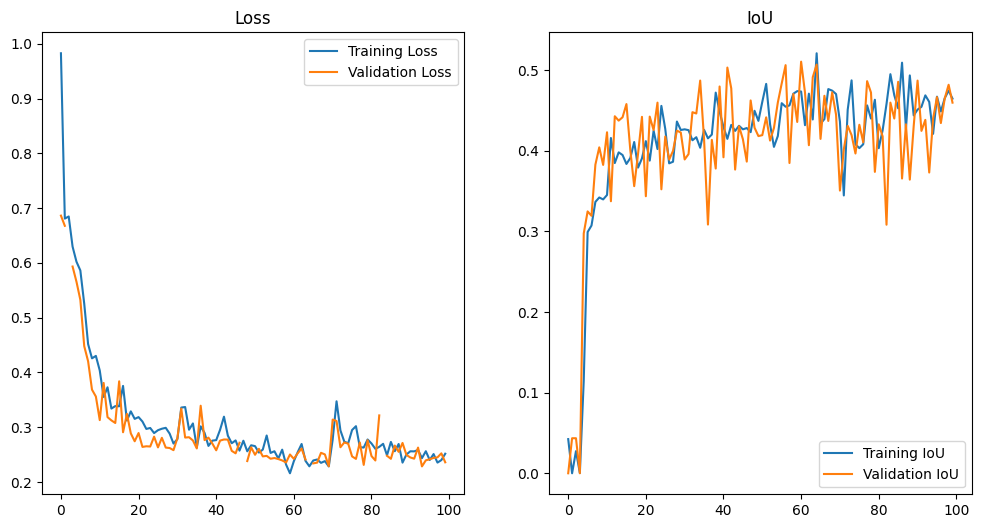

None

Max Validation IoU: 0.5107


In [ ]:
# Import all required libraries at the beginning
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms.functional as F
from torchvision import transforms
import random
from PIL import Image
import os
import numpy as np
import rasterio
import csv
from tqdm.notebook import tqdm
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
%matplotlib inline

# Hyperparameters
LR = 5e-4
EPOCHS = 100
EPOCHS_PER_UPDATE = 1
RUNNAME = "Sen1Floods11"

# Data Processing and Augmentation
class InMemoryDataset(torch.utils.data.Dataset):
    def __init__(self, data_list, preprocess_func):
        self.data_list = data_list
        self.preprocess_func = preprocess_func

    def __getitem__(self, i):
        return self.preprocess_func(self.data_list[i])

    def __len__(self):
        return len(self.data_list)

def processAndAugment(data):
    (x,y) = data
    im, label = x.copy(), y.copy()

    # convert to PIL for easier transforms
    im1 = Image.fromarray(im[0])
    im2 = Image.fromarray(im[1])
    label = Image.fromarray(label.squeeze())

    # Get params for random transforms
    i, j, h, w = transforms.RandomCrop.get_params(im1, (256, 256))

    im1 = F.crop(im1, i, j, h, w)
    im2 = F.crop(im2, i, j, h, w)
    label = F.crop(label, i, j, h, w)
    if random.random() > 0.5:
        im1 = F.hflip(im1)
        im2 = F.hflip(im2)
        label = F.hflip(label)
    if random.random() > 0.5:
        im1 = F.vflip(im1)
        im2 = F.vflip(im2)
        label = F.vflip(label)

    norm = transforms.Normalize([0.6851, 0.5235], [0.0820, 0.1102])
    im = torch.stack([transforms.ToTensor()(im1).squeeze(), transforms.ToTensor()(im2).squeeze()])
    im = norm(im)
    label = transforms.ToTensor()(label).squeeze()
    if torch.sum(label.gt(.003) * label.lt(.004)):
        label *= 255
    label = label.round()

    return im, label

def processTestIm(data):
    (x,y) = data
    im, label = x.copy(), y.copy()
    norm = transforms.Normalize([0.6851, 0.5235], [0.0820, 0.1102])

    # convert to PIL for easier transforms
    im_c1 = Image.fromarray(im[0]).resize((512,512))
    im_c2 = Image.fromarray(im[1]).resize((512,512))
    label = Image.fromarray(label.squeeze()).resize((512,512))

    im_c1s = [F.crop(im_c1, 0, 0, 256, 256), F.crop(im_c1, 0, 256, 256, 256),
              F.crop(im_c1, 256, 0, 256, 256), F.crop(im_c1, 256, 256, 256, 256)]
    im_c2s = [F.crop(im_c2, 0, 0, 256, 256), F.crop(im_c2, 0, 256, 256, 256),
              F.crop(im_c2, 256, 0, 256, 256), F.crop(im_c2, 256, 256, 256, 256)]
    labels = [F.crop(label, 0, 0, 256, 256), F.crop(label, 0, 256, 256, 256),
              F.crop(label, 256, 0, 256, 256), F.crop(label, 256, 256, 256, 256)]

    ims = [torch.stack((transforms.ToTensor()(x).squeeze(),
                      transforms.ToTensor()(y).squeeze()))
                      for (x,y) in zip(im_c1s, im_c2s)]

    ims = [norm(im) for im in ims]
    ims = torch.stack(ims)

    labels = [(transforms.ToTensor()(label).squeeze()) for label in labels]
    labels = torch.stack(labels)

    if torch.sum(labels.gt(.003) * labels.lt(.004)):
        labels *= 255
    labels = labels.round()

    return ims, labels

# Metrics
def computeIOU(output, target):
    output = torch.argmax(output, dim=1).flatten().cpu()
    target = target.flatten().cpu()

    no_ignore = target.ne(255)
    output = output.masked_select(no_ignore)
    target = target.masked_select(no_ignore)
    intersection = torch.sum(output * target)
    union = torch.sum(target) + torch.sum(output) - intersection
    iou = (intersection + .0000001) / (union + .0000001)

    if iou != iou:
        print("failed, replacing with 0")
        iou = torch.tensor(0).float()

    return iou

def computeAccuracy(output, target):
    output = torch.argmax(output, dim=1).flatten().cpu()
    target = target.flatten().cpu()

    no_ignore = target.ne(255)
    output = output.masked_select(no_ignore)
    target = target.masked_select(no_ignore)
    correct = torch.sum(output.eq(target))

    return correct.float() / len(target)

# Model Definition
net = models.segmentation.fcn_resnet50(pretrained=False, num_classes=2, pretrained_backbone=False)
net.backbone.conv1 = nn.Conv2d(2, 64, kernel_size=7, stride=2, padding=3, bias=False)

criterion = nn.CrossEntropyLoss(weight=torch.tensor([1,8]).float().cuda(), ignore_index=255)
optimizer = torch.optim.AdamW(net.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, len(train_loader) * 10, T_mult=2, eta_min=0, last_epoch=-1)

def convertBNtoGN(module, num_groups=16):
    if isinstance(module, torch.nn.modules.batchnorm.BatchNorm2d):
        mod = nn.GroupNorm(num_groups, module.num_features,
                          eps=module.eps, affine=module.affine)
        if module.affine:
            mod.weight.data = module.weight.data.clone().detach()
            mod.bias.data = module.bias.data.clone().detach()
        return mod

    for name, child in module.named_children():
        module.add_module(name, convertBNtoGN(child, num_groups=num_groups))

    return module

net = convertBNtoGN(net).cuda()

# Training and Validation Loops
def train_loop(inputs, labels, net, optimizer, scheduler):
    global running_loss, running_iou, running_count, running_accuracy

    optimizer.zero_grad()
    net = net.cuda()

    outputs = net(inputs.cuda())
    loss = criterion(outputs["out"], labels.long().cuda())
    loss.backward()
    optimizer.step()
    scheduler.step()

    running_loss += loss.item()
    running_iou += computeIOU(outputs["out"], labels.cuda()).item()
    running_accuracy += computeAccuracy(outputs["out"], labels.cuda()).item()
    running_count += 1

def validation_loop(validation_data_loader, net):
    global running_loss, running_iou, running_count, running_accuracy, max_valid_iou
    global training_losses, training_accuracies, training_ious
    global valid_losses, valid_accuracies, valid_ious

    net = net.eval().cuda()
    count = 0
    valid_iou = 0
    valid_loss = 0
    valid_accuracy = 0

    with torch.no_grad():
        for (images, labels) in validation_data_loader:
            outputs = net(images.cuda())
            valid_loss += criterion(outputs["out"], labels.long().cuda()).item()
            valid_iou += computeIOU(outputs["out"], labels.cuda()).item()
            valid_accuracy += computeAccuracy(outputs["out"], labels.cuda()).item()
            count += 1

    valid_iou /= count
    valid_loss /= count
    valid_accuracy /= count

    if valid_iou > max_valid_iou:
        max_valid_iou = valid_iou
        save_path = os.path.join("checkpoints", f"{RUNNAME}_{epoch}_{valid_iou:.4f}.cp")
        torch.save(net.state_dict(), save_path)
        print(f"model saved at {save_path}")

    print(f"Training Loss: {running_loss / running_count:.4f}")
    print(f"Training IOU: {running_iou / running_count:.4f}")
    print(f"Training Accuracy: {running_accuracy / running_count:.4f}")
    print(f"Validation Loss: {valid_loss:.4f}")
    print(f"Validation IOU: {valid_iou:.4f}")
    print(f"Validation Accuracy: {valid_accuracy:.4f}")

    training_losses.append(running_loss / running_count)
    training_accuracies.append(running_accuracy / running_count)
    training_ious.append(running_iou / running_count)
    valid_losses.append(valid_loss)
    valid_accuracies.append(valid_accuracy)
    valid_ious.append(valid_iou)

# Training Execution
def train_epoch(net, optimizer, scheduler, train_iter):
    for (inputs, labels) in tqdm(train_iter):
        train_loop(inputs.cuda(), labels.cuda(), net.cuda(), optimizer, scheduler)

def train_validation_loop(net, optimizer, scheduler, train_loader, valid_loader, num_epochs, epoch):
    global running_loss, running_iou, running_count, running_accuracy

    net = net.train().cuda()
    running_loss = 0
    running_iou = 0
    running_count = 0
    running_accuracy = 0

    for _ in tqdm(range(num_epochs)):
        train_iter = iter(train_loader)
        train_epoch(net, optimizer, scheduler, train_iter)

    clear_output()
    print(f"Current Epoch: {epoch}")
    validation_loop(iter(valid_loader), net)

# Main Training Loop
max_valid_iou = 0
start_epoch = 0
epochs = []
training_losses = []
training_accuracies = []
training_ious = []
valid_losses = []
valid_accuracies = []
valid_ious = []

for epoch in range(start_epoch, EPOCHS):
    train_validation_loop(net, optimizer, scheduler, train_loader, valid_loader, EPOCHS_PER_UPDATE, epoch)
    epochs.append(epoch)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, training_losses, label='Training Loss')
    plt.plot(epochs, valid_losses, label='Validation Loss')
    plt.legend()
    plt.title('Loss')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, training_ious, label='Training IoU')
    plt.plot(epochs, valid_ious, label='Validation IoU')
    plt.legend()
    plt.title('IoU')

    display(plt.show())
    print(f"Max Validation IoU: {max_valid_iou:.4f}")

In [ ]:
# Save the entire model (architecture + weights)
model_save_path = '/content/sen1floods11_fcn_resnet50.pth'
torch.save({
    'epoch': epoch,
    'model_state_dict': net.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': running_loss / running_count,
    'iou': max_valid_iou,
}, model_save_path)

print(f"Model saved to {model_save_path}")

Model saved to /content/sen1floods11_fcn_resnet50.pth


In [ ]:
from google.colab import files
files.download(model_save_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>